# Md. Rakibul Hasan
## 2017831005
### 23 Oct, 2022

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns

In [66]:
! gdown 1lM7HpS2p7BmgdjdBdDv6UITYAoJ-TqjS

Downloading...
From: https://drive.google.com/uc?id=1lM7HpS2p7BmgdjdBdDv6UITYAoJ-TqjS
To: /content/data2.txt
100% 2.35k/2.35k [00:00<00:00, 4.05MB/s]


In [67]:
data = pd.read_csv("data2.txt", header=None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [68]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data['y'] == 0
    pos = data['y'] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='orange', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

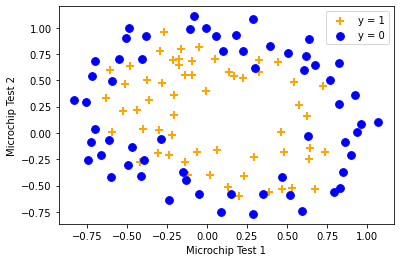

In [69]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [70]:
n = data.shape[1]-1
x = data[data.columns[0:n]]

y = data[data.columns[n:n+1]]
# convert to np.array
X = x.values
y = y.values
X

array([[ 0.051267 ,  0.69956  ],
       [-0.092742 ,  0.68494  ],
       [-0.21371  ,  0.69225  ],
       [-0.375    ,  0.50219  ],
       [-0.51325  ,  0.46564  ],
       [-0.52477  ,  0.2098   ],
       [-0.39804  ,  0.034357 ],
       [-0.30588  , -0.19225  ],
       [ 0.016705 , -0.40424  ],
       [ 0.13191  , -0.51389  ],
       [ 0.38537  , -0.56506  ],
       [ 0.52938  , -0.5212   ],
       [ 0.63882  , -0.24342  ],
       [ 0.73675  , -0.18494  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.322    ,  0.5826   ],
       [ 0.16647  ,  0.53874  ],
       [-0.046659 ,  0.81652  ],
       [-0.17339  ,  0.69956  ],
       [-0.47869  ,  0.63377  ],
       [-0.60541  ,  0.59722  ],
       [-0.62846  ,  0.33406  ],
       [-0.59389  ,  0.005117 ],
       [-0.42108  , -0.27266  ],
       [-0.11578  , -0.39693  ],
       [ 0.20104  , -0.60161  ],
       [ 0.46601  , -0.53582  ],
       [ 0.67339  , -0.53582  ],
       [-0.13882  ,  0.54605  ],
       [-0.29435  ,  0.77997  ],
       [-0

In [71]:
def mapFeature( x1col, x2col):
    degrees = 12
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [72]:
XX = mapFeature(X[:,0],X[:,1])
print(X.shape, XX.shape)

(118, 2) (118, 91)


In [73]:
from scipy.special import expit #Vectorized sigmoid function

#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))

In [74]:

#Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 

    m = myy.size # number of training examples

    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [75]:
def sigmoid(z):
  z = np.clip( z, -500, 500 )
  g = 1.0/(1.0+np.exp(-z))
  return g

In [76]:
def compute_gradient_logistic(X, y, w):
  m,n = X.shape
  dj_dw = np.zeros((n,))

  for i in range(m):
    f_wb_i = sigmoid(np.dot(X[i], w))
    err_i  = f_wb_i  - y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err_i * X[i,j]
  dj_dw = dj_dw/m
      
  return dj_dw

In [77]:
import copy
import math
initial_theta = np.zeros((XX.shape[1]))

def optimizeRegularizedTheta(mytheta, myX, myy, alpha, num_iters, mylambda=0.):
  m = myX.shape[0]
  J_history = []
  w = copy.deepcopy(mytheta)

  for i in range(num_iters):
    dj_dw = compute_gradient_logistic(myX, myy, w)
    w = w*(1-alpha*(mylambda/m)) - alpha * dj_dw
    if i<100000:
        J_history.append( computeCost(w, myX, myy, mylambda) )
    if i% math.ceil(num_iters / 10) == 0:
        print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
  return w, min(J_history)
    
theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y, 0.1, 100)
print(theta)
print(mincost)

Iteration    0: Cost 0.6906735692732336   
Iteration   10: Cost 0.6717256490905966   
Iteration   20: Cost 0.658896907170822   
Iteration   30: Cost 0.6489743095985827   
Iteration   40: Cost 0.6406639453790834   
Iteration   50: Cost 0.6333853959460828   
Iteration   60: Cost 0.6268407832485564   
Iteration   70: Cost 0.6208566361739718   
Iteration   80: Cost 0.6153208327886878   
Iteration   90: Cost 0.6101550284737389   
[ 2.24545966e-01 -3.50551475e-02  1.86576615e-01 -3.62996038e-01
 -1.05407386e-01 -1.70375498e-01 -6.98168770e-02 -4.83995316e-02
 -6.28792295e-02 -4.83486315e-02 -2.85789631e-01 -1.40113188e-02
 -9.79319372e-02 -2.92959170e-02 -1.96685692e-01 -1.03007077e-01
 -3.21620287e-02 -2.22826507e-02 -4.06183608e-02 -3.95075886e-02
 -1.17775513e-01 -2.16679163e-01 -3.57553155e-03 -5.05435052e-02
 -2.11839605e-03 -5.30372641e-02 -1.35673034e-02 -1.87395201e-01
 -1.10937645e-01 -1.93349074e-02 -1.57474424e-02 -1.73768243e-02
 -1.02686156e-02 -3.02573833e-02 -2.26844840e-02 -1

In [78]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    alpha = .1
    iters = 1000

    theta, mincost = optimizeRegularizedTheta(mytheta, myX, myy, alpha, iters, mylambda)
    print(theta, '\n\nCost : ', mincost, '\n \n ')
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
            # print(type(zvals), zvals.shape)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

Iteration    0: Cost 0.6906735692732336   
Iteration  100: Cost 0.6053014012861468   
Iteration  200: Cost 0.5674194289432167   
Iteration  300: Cost 0.5402043463946672   
Iteration  400: Cost 0.5188801326053591   
Iteration  500: Cost 0.5015157524836216   
Iteration  600: Cost 0.48702193890960244   
Iteration  700: Cost 0.4746967864960022   
Iteration  800: Cost 0.4640584617997921   
Iteration  900: Cost 0.45476295162715924   
[ 1.25205364e+00  7.36714003e-01  1.32691676e+00 -2.03492040e+00
 -9.44252865e-01 -1.19639832e+00  2.61292082e-01 -4.21239241e-01
 -4.26604209e-01  1.80488470e-02 -1.47624259e+00 -8.61478924e-02
 -6.71864505e-01 -3.03076630e-01 -1.02106866e+00 -1.30772609e-01
 -2.43731981e-01 -8.01036478e-02 -2.95132467e-01 -3.41376286e-01
 -2.73395211e-01 -1.03278800e+00  8.00604942e-03 -3.26193729e-01
 -6.42616909e-03 -3.49515124e-01 -1.69761124e-01 -7.60026837e-01
 -2.74551019e-01 -1.23709863e-01 -5.84220490e-02 -1.28206904e-01
 -5.34613545e-02 -1.83513734e-01 -2.29859884e-01

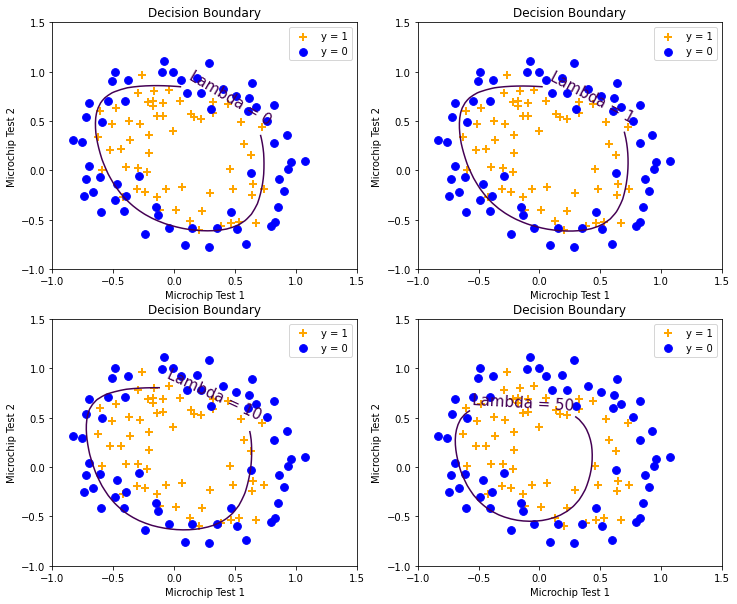

In [79]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta, XX, y, 0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,50.)